# Title

In [1]:
# load modules/packages
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sb


In [9]:
## load data, prepare data for pipeline ## 

# to load my custom vdW heterostructure dataset (uses custom package 'hetml' - not fully released/published)
from hetml.data.dataloaders import load_featureset, load_prediction_dataset

# load the features/targets for predicting the ionization energy (IE)
TARGET = 'IE'
X0 ,_ , Xall   = load_featureset(target=TARGET)
targets = load_prediction_dataset(target=TARGET)

# get lasso coefs (from previous work)
fpath = f'../data/lasso_coefs/lasso_coefs_{TARGET}.csv'
coefs = pd.read_csv(fpath, index_col=0)

# prepare data
selected_feats = coefs.abs().iloc[:10].index.tolist()  # top 10 features only
y = pd.Series(data=targets.y_pred, index=targets.index)
X0 = X0.reindex(columns=selected_feats)
Xall = Xall.reindex(columns=selected_feats )
X = pd.concat((X0, Xall))
X = X.reindex(y.index)

# final features/targets
features = X.copy() 
targets  = y.copy() 
print(features.shape, targets.shape)

returning --> master | targets

Preprocessing Steps:
Feature Space Dim: (6332, 342)
Targets Dim: (790, 37)
	-building Anderson's Rule classes
	-building stacking configuration classes
	-using AUB bilayers, transforming to binary classes
	-dropping feature columns: (6332, 90)
	-dropping metal bilayers: (689, 37)
	-dropping Type III bilayers: (600, 37)
II    310
I     290
Name: band_alignment, dtype: int64
	-dropping bilayers w/ ILD < 2.5: (595, 37)
	-dropping bilayers w/ Eb > 40 meV: (595, 37)
	-dropping bilayers w/ charge transf. > 1 |e|: (595, 37)
	-one-hot-encod band alignment: (6332, 91)

Final --> Feature Space Dim: (6332, 91)
Final --> Targets Dim: (595, 37)

target = 'IE'  stacktype = 'AUB'
x dim: (595, 91)
y dim: (595,)
unlabeled-X dim: (5737, 91)


All Features (Pre-Feature Selection) (p=91):
['avg_gap_nosoc', 'avg_evac', 'avg_hform', 'avg_emass1', 'avg_emass2', 'avg_efermi_hse_nosoc', 'avg_cbm', 'avg_vbm', 'avg_excitonmass1', 'avg_excitonmass2', 'avg_alphax', 'avg_alphaz', 'av

In [13]:
import plotly.express as px
fig = px.histogram(targets, marginal='box')
fig.show() 

/home/daniel/opt/miniconda3/envs/ml-het/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/daniel/opt/miniconda3/envs/ml-het/lib/python3.8/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/daniel/opt/miniconda3/envs/ml-het/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


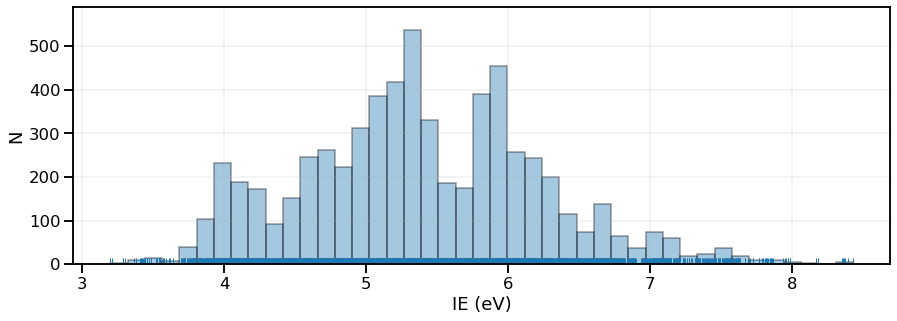

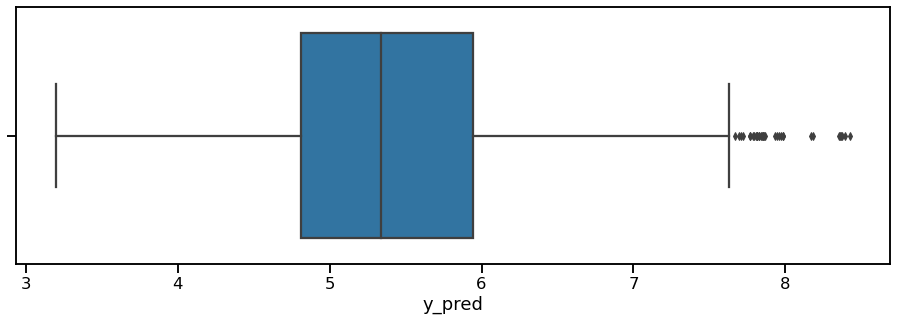

In [11]:
## Explore the target (IE) values
import plotters

sb.set_context('talk')
fig, ax = plt.subplots(figsize=plotters.fs()*[2,1])

# plot the dist. of the target value
sb.distplot(targets, rug=True, kde=False, hist_kws=dict(ec='k'), ax=ax)
plotters.myax(ax, 'IE (eV)', 'N')
fig.tight_layout() 
fig.show() 
# plot boxplot
fig, ax = plt.subplots(figsize=plotters.fs()*[2,1])
sb.boxplot(targets, ax=ax)
fig.tight_layout() 
fig.show() 

In [8]:
targets 

,y_pred,y_true
huid-9661-AB,5.965758,5.899142
huid-16088-AA,5.638821,5.694483
huid-5130-AA,4.632331,4.651254
huid-722-AA,6.065312,6.008586
huid-9803-AA,4.770038,4.714629
...,...,...
huid-16438-AB,5.639651,NaN
huid-16440-AB,5.380146,NaN
huid-16454-AB,4.434024,NaN
huid-16457-AB,5.339163,NaN
